# **1. Gradient Descent Method**

## 1.1 Base Method

**idea:** find the minimum of a function by moving iteratively in the direction of greatest descent, which is opposite to the gradient.

**Pseudocode**
```python
for i in range(n):
    v = ∇f
    s* = min f(xi- sv)
    xi+1 = xi - s*v
```


Remember that $\nabla f(x_1,x_2,...,x_n) = (\frac{\partial f }{\partial x_1} , \frac{\partial f}{\partial x_2} , ... , \frac{\partial f}{\partial x_n})$

---

## 1.2 Study case: minimize a convex quadratic function

We want to minimize the following convex quadratic function:

$$
\begin{align*}
\Phi(y) = \frac{1}{2} y^T Ay-y^T b
\end{align*}
$$

Where $A$ is a positive definite and symmetric matrix. We start by calculating the gradient.
$$
\begin{align*}
\nabla \Phi (y) &= \frac{1}{2} (A^T + A)y-b= 0 \\
\nabla \Phi (y) &= Ay -b =0
\end{align*}
$$

So now we need to solve the system $Ay=b$, we define the residue as:
$$
r_k = b- Ax_K
$$

An iterative method is defined to solve the system:

$$
\begin{align*}
x_{k+1} = x_k + `vector` \\
\end{align*}
$$

Using the gradient descent logic, we defined the $`vector`$ in the direction of the maximun decrease.

$$
\begin{align*}
x_{k+1} &= x_k + \alpha_k(A x_k -b) \\
x_{k+1} &= x_k + \alpha_k r_k
\end{align*}
$$

### 1.2.1 How we get $\alpha$ ?
We can defined a root search, first go with the iterative method of $\Phi()$:
$$
\Phi(x_{k+1}) = \frac{1}{2} (x_k + \alpha_k r_k)^T A (x_k + \alpha_k r_k) - (x_k + \alpha r_k)^T b
$$

When $x_k$ and $r_K$ are know $\rightarrow$ $f(\alpha) = \Phi(x_k + \alpha r_k)$ so we can use the Newton Nethod:

$$
\alpha = \frac{r^T r_K}{r_k^T A r_k}
$$

---

# **2. Conjugate Gradient Method**

## 2,1 Reflections on the Gradient Descent Method

We build the solution of the system of linear equations iteratively of the next form:

$$
\begin{aligned}
    \mathbf{x}_1 &= \mathbf{x}_0 + \alpha_0 \mathbf{r}_0, \\
    \mathbf{x}_2 &= \mathbf{x}_1 + \alpha_1 \mathbf{r}_1, \\
    &\ \vdots \\
    \mathbf{x}_{k+1} &= \mathbf{x}_k + \alpha_k \mathbf{r}_k
\end{aligned}

$$

\begin{aligned}
    &\Rightarrow \mathbf{x}_2 = \mathbf{x}_0 + \alpha_0 \mathbf{r}_0 + \alpha_1 \mathbf{r}_1, \\
    &\mathbf{x}_2 = \mathbf{x}_0 +
    \underbrace{\begin{bmatrix}
        \mathbf{r}_0 & \mathbf{r}_1
    \end{bmatrix}}_{\text{Base}}
    \begin{bmatrix}
        \alpha_0 \\
        \alpha_1
    \end{bmatrix}, \\
    &\vdots \\
    &\mathbf{x}_{k+1} = \mathbf{x}_0 +
    \underbrace{\begin{bmatrix}
        \mathbf{r}_0 & \cdots & \mathbf{r}_k
    \end{bmatrix}}_{\text{Base}}
    \begin{bmatrix}
        \alpha_0 \\
        \vdots \\
        \alpha_k
    \end{bmatrix}.
\end{aligned}


1. If we want to build a base at $ \mathbb{R}^n $ we only need $n$ vectors **linearly independent**.
2. Therefore, we should not need more than $n$ iterations to represent the solution with exact arithmetic.
3. I assume that with the convenient address you can converge at the most $n$ Iterations and potentially less than $n$.

---

## 2.2 Derivation of the conjugated gradient method

It seeks to build the X solution as a linear combination of linearly independent vector in $\mathbb{R}^n$, that is:

$$
x = x_0 + \sum_{i=0}^{n-1} \alpha_i d_i \tag{1}
$$

with this notation:

$$
\begin{aligned}
    \mathbf{x}_1 &= \mathbf{x}_0 + \alpha_0 \mathbf{d}_0, \\
    \mathbf{x}_2 &= \mathbf{x}_1 + \alpha_1 \mathbf{d}_1, \\
    &\ \vdots \\
    \mathbf{x}_n &= \mathbf{x}_{n-1} + \alpha_{n-1} \mathbf{d}_{n-1},
\end{aligned}
$$
we can define: 

$$
\begin{aligned}
    \mathbf{x}_{k+1} = \mathbf{x_k} + \alpha_k \mathbf{d}_k \tag{2}
\end{aligned}
$$
We multiply the EC (2) by -A on the left:
$$
\begin{aligned}
    -A\mathbf{x}_{k+1} = -A\mathbf{x_k} - \alpha_k A\mathbf{d}_k
\end{aligned}
$$
And adding B on both sides we get:
$$
\begin{aligned}
    \mathbf{r}_{k+1} = \mathbf{r}_k - \alpha_k A \mathbf{d}_k \tag{3}
\end{aligned}
$$
Therefore we have found a relationship between residual vectors based on directions $\mathbf{d}_k$, but we lack a form of find $\alpha_k$ and $d_k$, that are needed in equations (2) & (3)

---

## 2.3 Find $\alpha$ and $\mathbf{d}$
We start replacing (1) in ax = b

$$
\begin{aligned}
    A \bigg ( x_0 + \sum_{i=0}^{n-1} \alpha_i \mathbf{d}_i \bigg) =b \\
    A x_0  + \sum_{i=0}^{n-1} \alpha_i \mathbf{d}_i =b

\end{aligned}
$$

Re-writing we get,
$$
\alpha_0 A \mathbf{d}_0 + \alpha_1 A \mathbf{d}_1 + ... + \alpha_{n-1} A \mathbf{d}_{n-1} = \mathbf{b}- A x_0 = \mathbf{r}_0
$$


Then, using orthogonality properties, we get:


$$
\begin{aligned}
\alpha_k = \frac{\mathbf{d}_k^T \mathbf{r}_k}{\mathbf{d}_k^T A \mathbf{d}_k} = \frac{\mathbf{d}_k^T \mathbf{r}_0}{\mathbf{d}_k^T A \mathbf{d}_k} \\
\mathbf{d}_{k+1} = \mathbf{r}_{k+1} - \beta_{k} \mathbf{d}_k \\
\beta_k = \frac{\mathbf{d}_k^T A \mathbf{r}_{k+1}}{\mathbf{d}_k^T A \mathbf{d}_k}

\end{aligned}
$$

---

## 2.4 Psuedocode V.1

$$
\begin{aligned}
&\mathbf{x}_0 = \text{"dato"} \\
&\mathbf{r}_0 = \mathbf{b} - A \mathbf{x}_0 \\
&\mathbf{d}_0 = \mathbf{r}_0 \\
&\textbf{for } k \in \text{range}(0, n): \\
&\quad \alpha_k = \frac{\mathbf{d}_k^T \mathbf{r}_k}{\mathbf{d}_k^T A \mathbf{d}_k} \quad \longrightarrow \quad A\mathbf{y} = \mathrm{afun}(\mathbf{y}) \\
&\quad \mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{d}_k \\
&\quad \mathbf{r}_{k+1} = \mathbf{r}_k - \alpha_k A \mathbf{d}_k = \mathbf{b} - A \mathbf{x}_{k+1} \\
&\quad \beta_k = \frac{\mathbf{d}_k^T A \mathbf{r}_{k+1}}{\mathbf{d}_k^T A \mathbf{d}_k} \\
&\quad \mathbf{d}_{k+1} = \mathbf{r}_{k+1} - \beta_k \mathbf{d}_k
\end{aligned}
$$

---

## 2.5 Pseudocode V.2

$$
\begin{aligned}
&\mathbf{x}_0 = \text{"dato"} \\
&\mathbf{d}_0 = \mathbf{r}_0 = \mathbf{b} - A \mathbf{x}_0 \\
&{\textbf{for } k \in \text{range}(n):} \\
&\quad {\textbf{if }} \|\mathbf{r}_k\| == 0: \\
&\quad\quad {\textbf{break}} \\
&\quad \alpha_k = \frac{\mathbf{r}_k^T \mathbf{r}_k}{\mathbf{d}_k^T A \mathbf{d}_k} \\
&\quad \mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{d}_k \\
&\quad \mathbf{r}_{k+1} = \mathbf{r}_k - \alpha_k A \mathbf{d}_k \\
&\quad \beta_k = \frac{\mathbf{r}_{k+1}^T \mathbf{r}_{k+1}}{\mathbf{r}_k^T \mathbf{r}_k} \\
&\quad \mathbf{d}_{k+1} = \mathbf{r}_{k+1} + \beta_k \mathbf{d}_k
\end{aligned}
$$



# 3. Implementation V1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spla
%matplotlib inline
from sklearn import datasets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, RadioButtons
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
M=8

In [ ]:
def f(x, a=3.0):
    return x**2 + (x - 2)*np.sin(a*x)

def fprime(x, a):
    return 2*x + np.sin(a*x) + a*(x - 2)*np.cos(a*x)

def gd_armijo(f, fprime, x0, a=3.0, n=500, tol=1e-8,
          alpha0=1.0, beta=0.5, c=1e-4):
    x = float(x0)
    traj = [x]
    for _ in range(n):
        grad = fprime(x, a)

        if abs(grad) <= tol:
            break
        # El residuo mide que tan lejos estamos de la solución b - Ax
        # si queremos minimizar una funcion seria equivalente a que el f'(x) =0
        r = -grad
        # Alpha del algoritmo D2.2.2 alpha = (r_k^T r_k) / es el optimo para una función cuadratica
        # ¿cómo resolvemos si tenemos una función generica?
        # usamos una alpha fijo o buscamos el mejor alpha
        alpha = alpha0
        fx = f(x, a)
        # armijo: Acepto el paso solo si me hace bajar lo suficiente según la pendiente actual.
        while f(x + alpha*r, a) > fx - c*alpha*(grad**2):
            # ¿de donde sale el grad^2?
            # f(x+αr)≈f(x)+αrg / y estamos usando r = -g
            alpha *= beta
        x = x + alpha*r
        traj.append(x)
    return x, np.array(traj)

def gd_fixed_alpha(f, fprime, x0, a=3.0, n=500, tol=1e-8, alpha=1.0):
    x = float(x0)
    traj = [x]
    for _ in range(n):
        grad = fprime(x, a)

        if abs(grad) <= tol:
            break
        r = -grad
        x = x + alpha*r
        traj.append(x)
    return x, np.array(traj)

# implementar sgd

def plot_with_path(a=3.0, x0=4.5):
    xgrid = np.linspace(-8, 8, 1600)
    ygrid = f(xgrid, a)
    xmin, path = gd_1d(f, fprime, x0, a=a)
    
    plt.figure()
    plt.plot(xgrid, ygrid, label=f"f(x) (a={a})")
    plt.plot(path, f(path, a), "o-", ms=3, label="GD trajectory")
    plt.plot(x0, f(x0, a), "o", ms=5, label="initial guess", c='black')
    plt.grid(True, alpha=0.3)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()
    
    print(f"x0={x0}  ->  x*≈{xmin:.6f},  f(x*)≈{f(xmin,a):.6f}")

# Slider para cambiar punto inicial
interact(plot_with_path, a=(0.5, 6.0, 0.1), x0=(-8.0, 8.0, 0.1))


interactive(children=(FloatSlider(value=3.0, description='a', max=6.0, min=0.5), FloatSlider(value=4.5, descri…

<function __main__.plot_with_path(a=3.0, x0=4.5)>

---

# revisar version vibe coder jeje

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# --- función objetivo y derivada ---
def f(x, a=3.0):
    return x**2 + (x - 2)*np.sin(a*x)

def fprime(x, a):
    return 2*x + np.sin(a*x) + a*(x - 2)*np.cos(a*x)

# --- Métodos de gradiente ---
def gd_armijo(f, fprime, x0, a=3.0, n=500, tol=1e-8,
              alpha0=1.0, beta=0.5, c=1e-4):
    x = float(x0)
    traj = [x]
    for _ in range(n):
        g = fprime(x, a)
        if abs(g) <= tol:
            break
        r = -g
        fx = f(x, a)
        alpha = alpha0
        # backtracking-Armijo: bajar lo suficiente ≈ fracción c del descenso lineal
        while f(x + alpha*r, a) > fx - c*alpha*(g**2):
            alpha *= beta
        x = x + alpha*r
        traj.append(x)
    return x, np.array(traj)

def gd_fixed_alpha(f, fprime, x0, a=3.0, n=500, tol=1e-8, alpha=0.05):
    x = float(x0)
    traj = [x]
    for _ in range(n):
        g = fprime(x, a)
        if abs(g) <= tol:
            break
        x = x - alpha*g
        traj.append(x)
    return x, np.array(traj)

def gd_sgd_noisy(f, fprime, x0, a=3.0, n=500, tol=1e-8,
                 alpha=0.05, decay=0.0, noise_std=0.2, seed=0):
    """
    'SGD' didáctico en 1D: gradiente + ruido ~ N(0, noise_std^2).
    decay controla alpha_t = alpha / (1 + decay*t).
    """
    rng = np.random.default_rng(seed)
    x = float(x0)
    traj = [x]
    for t in range(n):
        g = fprime(x, a)
        if abs(g) <= tol:
            break
        g_noisy = g + rng.normal(0.0, noise_std)
        lr = alpha / (1.0 + decay*t)
        x = x - lr*g_noisy
        traj.append(x)
    return x, np.array(traj)

# --- Dispatcher + plotting ---
def solve_and_plot(method='Armijo', a=3.0, x0=4.5, n=300,
                   # Armijo
                   alpha0=1.0, beta=0.5, c=1e-4,
                   # Fijo / SGD
                   alpha=0.05,
                   # SGD extra
                   decay=0.0, noise_std=0.2):
    xgrid = np.linspace(-8, 8, 1600)
    ygrid = f(xgrid, a)

    if method == 'Armijo':
        xmin, path = gd_armijo(f, fprime, x0, a=a, n=n, alpha0=alpha0, beta=beta, c=c)
        label_m = f"GD (Armijo)"
    elif method == 'Alpha fijo':
        xmin, path = gd_fixed_alpha(f, fprime, x0, a=a, n=n, alpha=alpha)
        label_m = f"GD (α fijo={alpha})"
    else:  # 'SGD (ruido)'
        xmin, path = gd_sgd_noisy(f, fprime, x0, a=a, n=n, alpha=alpha,
                                  decay=decay, noise_std=noise_std)
        label_m = f"SGD (α={alpha}, ruido={noise_std})"

    plt.figure()
    plt.plot(xgrid, ygrid, label=f"f(x) (a={a})")
    plt.plot(path, f(path, a), "o-", ms=3, label=label_m)
    plt.plot([x0], [f(x0, a)], "o", ms=5, label="x0", color="black")
    plt.grid(True, alpha=0.3)
    plt.xlabel("x"); plt.ylabel("f(x)")
    plt.legend(); plt.show()

    print(f"[{method}] x0={x0}  ->  x*≈{xmin:.6f},  f(x*)≈{f(xmin,a):.6f}")

# --- UI ---
interact(
    solve_and_plot,
    method=Dropdown(options=['Armijo', 'Alpha fijo', 'SGD (ruido)'], value='Armijo'),
    a=(0.5, 6.0, 0.1),
    x0=(-8.0, 8.0, 0.1),
    n=(50, 1000, 50),
    alpha0=(0.1, 5.0, 0.1),
    beta=(0.1, 0.9, 0.05),
    c=(1e-6, 1e-2, 1e-4),
    alpha=(0.001, 0.5, 0.005),
    decay=(0.0, 0.1, 0.005),
    noise_std=(0.0, 0.6, 0.02),
)


interactive(children=(Dropdown(description='method', options=('Armijo', 'Alpha fijo', 'SGD (ruido)'), value='A…

<function __main__.solve_and_plot(method='Armijo', a=3.0, x0=4.5, n=300, alpha0=1.0, beta=0.5, c=0.0001, alpha=0.05, decay=0.0, noise_std=0.2)>

# CODIGO PROFE

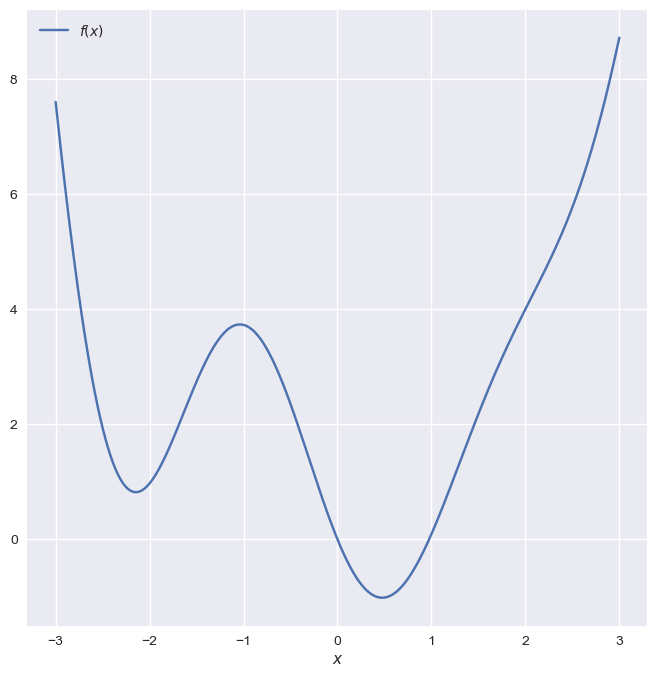

In [11]:
# Defining the function using a 'lambda' definition.
f = lambda x: (x - 2)*np.sin(2*x) + np.power(x,2)


xx = np.linspace(-3,3,1000)
# Plotting the function
plt.figure(figsize=(8,8))
plt.plot(xx,f(xx),'-',label=r'$f(x)$')
plt.grid(True)
plt.xlabel('$x$')
plt.legend(loc='best')
plt.show()

In [12]:
def GD_1D(x0=2, alpha=1, n=0):
    
    # Defining the function using a 'lambda' definition and its derivative.
    f = lambda x: (x-2)*np.sin(2*x)+np.power(x,2)
    fp = lambda x: 2*x+2*(x-2)*np.cos(2*x)+np.sin(2*x)
    
    # Plotting the function and its derivative.
    xx = np.linspace(-3,3,1000)
    plt.figure(figsize=(14,7))
    
    ax = plt.subplot(1,2,1)
    plt.plot(xx,f(xx),'b-',label=r'$f(x)$')
    # Warning: The 'alpha' parameter for the plt.plot function corresponds to
    # a transparency parameter, it is not related to the alpha parameter of
    # the Gradient Descent explained before.
    plt.plot(xx,fp(xx),'r-',label=r"$f'(x)$", alpha=0.5)
    plt.grid(True)
    plt.xlabel('$x$')
    plt.title('Plot in linear scale')
    
    # Plotting outcome with no iterations
    plt.plot(x0,f(x0),'k.',markersize=10,label=r'$x_i$')
    plt.plot(x0,fp(x0),'m.',markersize=10,label=r"$f'(x_i)$: 'Gradient'")
    ax = plt.subplot(1,2,2)
    plt.semilogy(xx,np.abs(f(xx)),'b-',label=r"$|f(x)|$")
    plt.semilogy(xx,np.abs(fp(xx)),'r-',label=r"$|f'(x)|$", alpha=0.5)
    plt.grid(True)
    plt.xlabel('$x$')
    plt.title('Plot in logarithmic scale')
    plt.semilogy(x0,np.abs(f(x0)),'k.',markersize=10,label=r'$x_i$')
    plt.semilogy(x0,np.abs(fp(x0)),'m.',markersize=10,label=r"$|f'(x_i)|$: 'Gradient'")
    
    # Computing steps of Gradient Descent
    if n>0:
        xi_output=np.zeros(n+1)
        xi_output[0]=x0
        for k in range(n):
            fp_x0=fp(x0)
            x1 = x0-alpha*fp_x0
            xi_output[k+1]=x1
            x0 = x1
        ax = plt.subplot(1,2,1)
        plt.plot(xi_output,f(xi_output),'k.-',markersize=10,label=r'$x_i$')
        plt.plot(xi_output,fp(xi_output),'m.',markersize=10)
        ax = plt.subplot(1,2,2)
        plt.semilogy(xi_output,np.abs(f(xi_output)),'k.-',markersize=10,label=r'$x_i$')
        plt.semilogy(xi_output,np.abs(fp(xi_output)),'m.',markersize=10)
        
    
    # Plotting outcome
    ax = plt.subplot(1,2,1)
    plt.legend(loc='best')
    ax = plt.subplot(1,2,2)
    plt.legend(loc='best')
    
    plt.show()
    
interact(GD_1D,x0=(-3,3,0.1), alpha=(0,10,0.01), n=(0,100,1))

interactive(children=(FloatSlider(value=2.0, description='x0', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

<function __main__.GD_1D(x0=2, alpha=1, n=0)>

In [13]:
def GD_2D_nonlinear(a0=0.75, b0=0.75, alpha=0, n=0, m=10, TheVariantFlag=False):
    
    # Building data.
    np.random.seed(0)
    a = 1.1
    b = 0.23
    y = lambda t: a*np.exp(b*t)
    T = 10
    ti = T*(np.random.rand(m)*2-1)
    yi = y(ti)+np.random.normal(loc=0, scale=0.1, size=m)
    
    # Defining the Gradient
    E = lambda a, b: np.sum(np.power(yi-a*np.exp(b*ti),2))
    G = lambda a, b: np.array([np.sum(2*np.exp(b*ti)*(a*np.exp(b*ti)-yi)), np.sum(2*a*np.exp(b*ti)*ti*(a*np.exp(b*ti)-yi))],dtype=float)
    # This fucntion will help us to evaluate the Gradient on the points (X[i,j],Y[i,j])
    def E_mG_XY(AA,BB):
        Z = np.zeros_like(AA)
        U = np.zeros_like(AA)
        V = np.zeros_like(AA)
        for i in range(m):
            for j in range(m):
                Z[i,j]=E(AA[i,j],BB[i,j])
                uv = -G(AA[i,j],BB[i,j])
                U[i,j] = uv[0]
                V[i,j] = uv[1]
        return Z, U, V
    
    # Plotting the function and its gradient.
    # Credits: 
    #  https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html
    #  https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/
    x = np.linspace(-3,3,m)
    AA, BB = np.meshgrid(x,x)
    fig = plt.figure(figsize=(14,10))
    Z, U, V = E_mG_XY(AA,BB)
    cont = plt.contour(AA,BB,Z, 10)
    stream = plt.streamplot(AA, BB, U, V, color=Z, linewidth=2, cmap='autumn', arrowstyle='->', arrowsize=2)
    fig.colorbar(stream.lines)
    fig.colorbar(cont)
    plt.scatter(a0, b0, s=300, marker='.', c='k')
    my_grad = G(a0,b0)
    my_title = r'$\alpha=$ %.4f, $E(a,b)=$ %.4f, $\nabla E(a,b)=$ [%.4f, %.4f]' %  (alpha, E(a0,b0), my_grad[0], my_grad[1])
    plt.title(my_title)
    
    # Computing steps of Gradient Descent
    if n>0:
        ab_output=np.zeros((n+1,2))
        z0 = np.array([a0,b0],dtype=float)
        z0[0] = a0
        z0[1] = b0
        ab_output[0,:]=z0
        # The Gradient Descent Algorithm
        for k in range(n):
            G_E_0=G(z0[0],z0[1])
            if not TheVariantFlag:
                # Traditional GD
                z1 = z0-alpha*G_E_0
            else:
                # The Variant! Why would this be useful?
                z1 = z0-alpha*G_E_0/np.linalg.norm(G_E_0)
            ab_output[k+1,:]=z1
            z0 = z1
            plt.scatter(z1[0], z1[1], s=300, marker='.', c='k')
        plt.plot(ab_output[:,0],ab_output[:,1],'k-')
        my_grad = G(ab_output[-1,0],ab_output[-1,1])
        my_title = r'$\alpha=$ %.6f, $E(a,b)=$ %.4f, $\nabla E(a,b)=$ [%.4f, %.4f]' %  (alpha, E(ab_output[-1,0],ab_output[-1,1]), my_grad[0], my_grad[1])
        plt.title(my_title)
        print('GD found:',ab_output[-1,0],ab_output[-1,1])
        
    # Plotting the original data and the "transformed" solution
    # Using the same notation from classnotes:
    A = np.ones((m,2))
    A[:,1]=ti
    K_c2 =np.linalg.lstsq(A,np.log(yi), rcond=None)[0]
    c1_ls = np.exp(K_c2[0])
    c2_ls = K_c2[1]
    print('Transformed Linear LS solution:',c1_ls, c2_ls)
    plt.plot(c1_ls,c2_ls,'ms',markersize=20, label='Transformed Linear LS')
    print('Original data:',a,b)
    plt.plot(a,b,'bd',markersize=20, label='Original data')
        
    plt.legend(loc='lower right')
    plt.show()

radio_button_TheVariant=RadioButtons(
    options=[('Traditional GD',False),('The Variant GD',True)],
    value=False,
    description='GD type:',
    disabled=False
)
    
interact(GD_2D_nonlinear, a0=(-2,2,0.01), b0=(-2,2,0.01), alpha=(0,1,0.0001), n=(0,1000,1), m=(10,100,10), TheVariantFlag=radio_button_TheVariant)

interactive(children=(FloatSlider(value=0.75, description='a0', max=2.0, min=-2.0, step=0.01), FloatSlider(val…

<function __main__.GD_2D_nonlinear(a0=0.75, b0=0.75, alpha=0, n=0, m=10, TheVariantFlag=False)>

# Mejoras

- SGD
- SDGD